In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
""" Character creator
###
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/"
%ls  #list directory

import pandas as pd
###
data = pd.read_csv("generated_df_0_100.csv",index_col = False)
text = data['generated_text']


corpus =[]
for index in range(len(text)):
  corpus.append(text[index])

###
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

###
model_name = 'NLP.h5'
model.save(model_name,save_format = 'h5')


#from keras.models import load_model
#probability_model = load_model("keras_high.h5")


#drive.flush_and_unmount()

"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
'Colab Notebooks'/   Comp3511.drawio          generated_df_100_900.csv   'NLP(text generation)'
 comp2211/           DataModeling.drawio      generated_df_900_1700.csv  'NLP with Tensorflow'
 Comp3111.drawio     generated_df_0_100.csv   NLP.h5                     'web qrcode.ipynb'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


' Character creator\n###\nfrom google.colab import drive\ndrive.mount("/content/drive")\n%cd "/content/drive/MyDrive/"\n%ls  #list directory\n\nimport pandas as pd\n###\ndata = pd.read_csv("generated_df_0_100.csv",index_col = False)\ntext = data[\'generated_text\']\n\n\ncorpus =[]\nfor index in range(len(text)):\n  corpus.append(text[index])\n\n###\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(corpus)\ntotal_words = len(tokenizer.word_index) + 1\n\nprint(tokenizer.word_index)\nprint(total_words)\n\n###\nmodel_name = \'NLP.h5\'\nmodel.save(model_name,save_format = \'h5\')\n\n\n#from keras.models import load_model\n#probability_model = load_model("keras_high.h5")\n\n\n#drive.flush_and_unmount()\n\n'

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2024-04-09 06:35:45--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 142.250.136.207, 142.250.148.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2024-04-09 06:35:46 (132 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n") #break into sentences

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

#generation text: tokenize all (bc no validation )


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] #tokenize each line

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

"""
n gram
[4 2 66 8 67 68 69 70]

[4 2]
[4 2 66 ]
[4 2 66 8 ]
[4 2 66 8 67 ]
[4 2 66 8 67 68]
[4 2 66 8 67 68 69]
[4 2 66 8 67 68 69 70]
"""

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences]) #get the longest length
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) #padding + convert to np

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #1-hot coding

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax')) #output representative
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 24s 48ms/step - loss: 6.6601 - accuracy: 0.0735
Epoch 2/100
377/377 [==============================] - 4s 11ms/step - loss: 5.8161 - accuracy: 0.1083
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 4.9944 - accuracy: 0.1580
Epoch 4/100
377/377 [==============================] - 4s 9ms/step - loss: 4.1290 - accuracy: 0.2233
Epoch 5/100
377/377 [==============================] - 4s 11ms/step - loss: 3.3184 - accuracy: 0.3134
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.6392 - accuracy: 0.4210
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 2.1485 - accuracy: 0.5080
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 1.7970 - accuracy: 0.5788
Epoch 9/100
377/377 [==============================] - 5s 12ms/step - loss: 1.5225 - accuracy: 0.6369
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.3435 - 

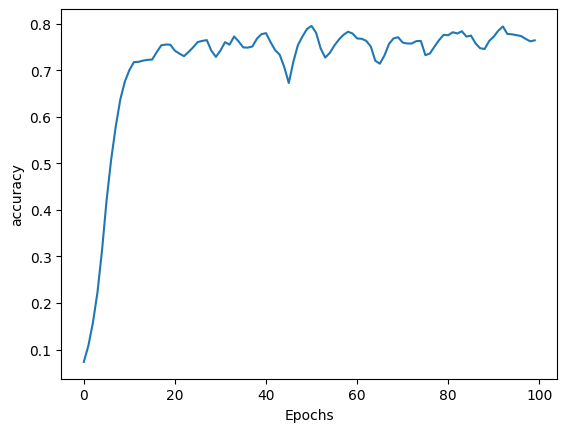

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')


In [ ]:

from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/"
from keras.models import load_model
model = load_model("Poem.h5")


seed_text = "Fly me to the moon"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]



  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list,verbose = 0), axis=-1) #get the "index" of the predicted word from every encoded word
  output_word = ""
  for word, index in tokenizer.word_index.items(): #search word by index
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
Fly me to the moon through the valley her pale rays was shedding a shedding far on your beauty and they ground on love and banish all care as our love grew with the linnet too ra all youve stranger your tags and gone away now mary mccree their fathers today and left the bridge of toome today today of hares and gathered them all with just all struggle and find him on and comrades love a minstrel boy to rambling has ireland faded into the mist do not fighting for your ship sailing early before i love best in any stranger and how does
